## Goals
-  Build a classification model for predicting loan approval or denial based on various demographic and financial features.

# Part One : From Scratch

In [1]:
import math, copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=5) 

# Problem Statement
We aim to provide insights into the relationship between the predictor variables and loan status. We will use this dataset to explore the impact of age, gender, marital_status, income  and credit_score on the status of a loan.

### Variables:
- age (int): The age of the individual.
- gender (binary): The gender of the individual, either 'Male' (1) or 'Female'(0).
- marital_status (binary): The marital status of the individual, either 'Married'(1) or 'Single'(0).
- income (int): The annual income of the individual in dollars.
- credit_score (int): The credit score of the individual, ranging from 300 to 850.
### Target Variable:
- loan_status (binary): The target variable, indicating whether the loan application was 'Approved' (1) or 'Denied' (0).
  
The training data is from [Kaggle](https://www.kaggle.com/datasets/sujithmandala/simple-loan-classification-dataset).

In [2]:
# Read CSV file
f = pd.read_csv("data/loan.csv")

In [3]:
# Display the first rows of the data frame
print(f.head())

   age  gender  marital_status  income  credit_score  loan_status
0   32       1               1   85000           720            1
1   45       0               0   62000           680            1
2   28       1               0   25000           590            0
3   51       0               1  105000           780            1
4   36       1               1   75000           710            1


In [4]:
# Describe the columns
print(f.columns)
# Check for null values
f.isnull().sum()

Index(['age', 'gender', 'marital_status', 'income', 'credit_score',
       'loan_status'],
      dtype='object')


age               0
gender            0
marital_status    0
income            0
credit_score      0
loan_status       0
dtype: int64

In [5]:
# Check for duplicated values
print("Number of Duplicates")
f.duplicated().sum()

Number of Duplicates


1

In [6]:
# Identify duplicated rows
duplicates = f[f.duplicated(keep=False)]
print("Duplicated Rows:")
print(duplicates)

Duplicated Rows:
    age  gender  marital_status  income  credit_score  loan_status
8    37       1               1   92000           750            1
52   37       1               1   92000           750            1


In [7]:
# Remove duplicated rows
f = f.drop_duplicates()

In [8]:
# Verify that duplicates have been removed
print("Number of Duplicates After Cleaning:")
print(f.duplicated().sum())

Number of Duplicates After Cleaning:
0


In [9]:
# Separate the independent variables (features)
X_train = np.array(f[['age', 'gender', 'marital_status', 'income', 'credit_score']])
# Separate the dependent variable (target)
y_train = np.array(f['loan_status'])

In [10]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")

X Shape: (57, 5), X Type:<class 'numpy.ndarray'>)
y Shape: (57,), y Type:<class 'numpy.ndarray'>)


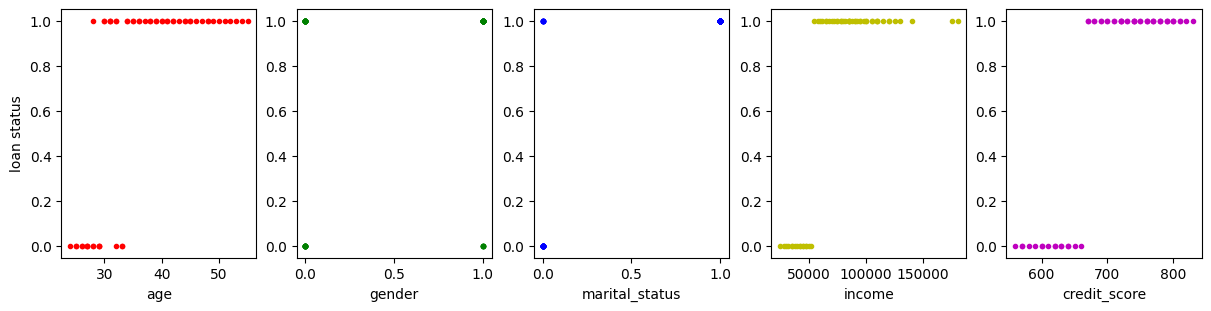

In [11]:
fig,ax=plt.subplots(1, 5, figsize=(12, 3), constrained_layout=True)
colors = ['r', 'g', 'b', 'y', 'm']
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train,marker='.',c=colors[i])
    ax[i].set_xlabel(f'{f.columns[i]}')
ax[0].set_ylabel("loan status")
plt.show()

# Compute Cost Fucntion

For logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] $$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) $$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)}) \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}} 
\end{align}
$$

### Logistic Model Prediction With Multiple Variables

In [12]:
def predict(x, w, b): 
    """
    single predict using logistic regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    z = np.dot(x, w) + b  
    f_wb = 1/(1+np.exp(-z))
    return f_wb 

In [13]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    cost = 0
    m = X.shape[0]
    for i in range(m):
        f_wb = predict( X[i],w,b)
        #  Loss for each point or example
        loss = -y[i]*np.log(f_wb) - (1 - y[i])*np.log(1-f_wb) 
        cost+=loss
    cost/=m
    return cost
        

# Logistic Gradient Descent With Multiple Features

The gradient descent algorithm:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model
  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    


## Compute Gradient with Multiple Variables
An implementation for calculating the equations is below. There are many ways to implement this. In this version, there is an :
- outer loop over all m examples.
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ for the example can be computed directly and accumulated    - in a second loop over all n features:
        -  $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ is computed for each $w_j$.
      

In [14]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db=0.
    for i in range(m):
        f_wb = predict( X[i],w,b)
        diff = f_wb - y[i]
        for j in range(n):
            dj_dw[j] += (diff*X[i,j])
        dj_db+=diff
    dj_dw/=m
    dj_db/=m
    return dj_dw, dj_db

## Gradient Descent Code 

In [15]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking num_iters gradient steps with learning rate alpha
    
    Args:
        X (ndarray (m,n))   : features
        y (ndarray (m,))    : targets
        w_in (ndarray (n,)) : initial model parameters  
        b_in (scalar)       : initial model parameter
        alpha (float)       : Learning rate ( between 0 and 1 )
        num_iters (int)     : number of iterations to run gradient descent
        cost_function       : function to call to produce cost
        gradient_function   : function to call to produce gradient
      
    Returns:
        w (ndarray (n,))   : Updated values of parameters 
        b (scalar)         : Updated value of parameter 
        history (List)     : History of cost values
      """
    cost_history = []
    params_history = np.zeros((num_iters,n))
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X,y,w,b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        if i<100000:
            cost_history.append(cost_function(X, y, w, b))
            params_history[i] = np.array(w)
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost_history[-1]:0.4f}   ")
        
    return w, b, params_history, cost_history

In [16]:
# initialize parameters
m,n = X_train.shape
initial_w = np.zeros((n))
initial_b =0
# some gradient descent settings
iterations = 100000
alpha = 3.0e-9
# run gradient descent 
w_final, b_final, params_history, cost_history= gradient_descent(X_train, y_train, initial_w, initial_b,
                                               alpha, iterations, compute_cost_logistic, compute_gradient_logistic, )
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")


Iteration    0: Cost 0.9629   
Iteration 10000: Cost 0.3729   
Iteration 20000: Cost 0.3248   
Iteration 30000: Cost 0.2891   
Iteration 40000: Cost 0.2617   
Iteration 50000: Cost 0.2402   
Iteration 60000: Cost 0.2229   
Iteration 70000: Cost 0.2087   
Iteration 80000: Cost 0.1967   
Iteration 90000: Cost 0.1866   
b,w found by gradient descent: -0.00,[-2.74943e-04  1.20940e-06  1.28029e-05  1.08497e-04 -8.39068e-03] 


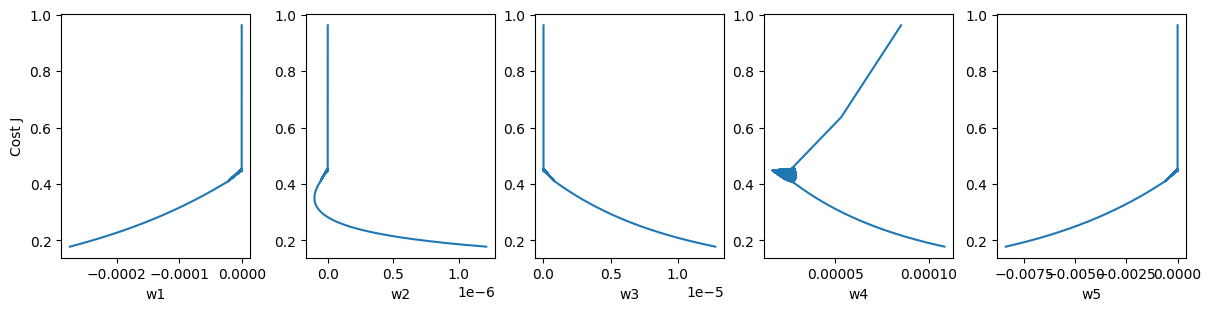

In [17]:
fig,ax=plt.subplots(1, 5, figsize=(12, 3), constrained_layout=True)
for i in range(len(ax)):
    ax[i].plot(params_history[:,i],cost_history)
    ax[i].set_xlabel(f'w{i+1}')
ax[0].set_ylabel("Cost J")
plt.show()

# Model Evaluation

In [18]:
y_hat = np.zeros((m,))
for i in range(m):
# We will asume our bounday desicion is 0.5 : if predicted value > 0.5 so loan status = 1 (Approved ) else denied
    y_hat[i] = predict(X_train[i],w_final,b_final)>0.5
    if(i%5==0):
        print(f"actual value = {y_train[i]}     - predicted value = {y_hat[i]}")

actual value = 1     - predicted value = 1.0
actual value = 0     - predicted value = 0.0
actual value = 1     - predicted value = 1.0
actual value = 0     - predicted value = 1.0
actual value = 1     - predicted value = 1.0
actual value = 1     - predicted value = 1.0
actual value = 0     - predicted value = 0.0
actual value = 1     - predicted value = 1.0
actual value = 1     - predicted value = 1.0
actual value = 1     - predicted value = 1.0
actual value = 1     - predicted value = 1.0
actual value = 1     - predicted value = 1.0


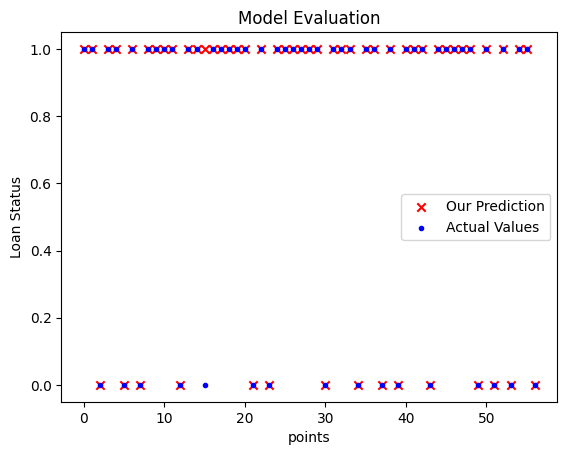

In [19]:
pts = np.arange(len(y_train))
# Plot our model prediction
plt.scatter(pts, y_hat, marker='x', c='r',label='Our Prediction')
# Plot the data points
plt.scatter(pts, y_train, marker='.', c='b',label='Actual Values')
# Set the title
plt.title("Model Evaluation")
# Set the y-axis label
plt.ylabel('Loan Status')
# Set the x-axis label
plt.xlabel('points')
plt.legend()
plt.show()

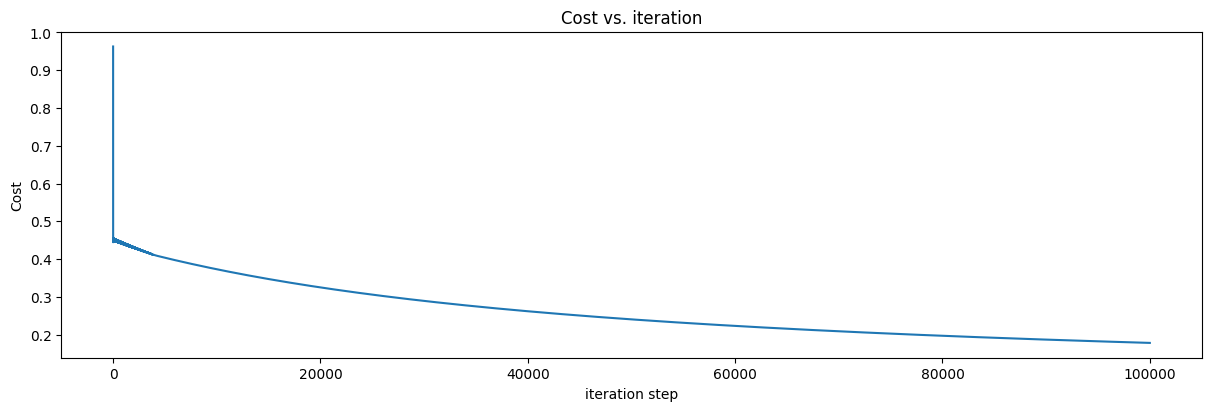

In [20]:
# plot cost versus iteration  
fig, (ax1) = plt.subplots(1, 1, constrained_layout=True, figsize=(12, 4))
ax1.plot(np.arange(len(cost_history)),cost_history)
ax1.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')             
ax1.set_xlabel('iteration step')  
plt.show()

## Prediction

In [21]:
def predict_loan_status(person):
    print(f"The predicted loan status for this student with : ")
    for i in range(5):
        print(f"\t \t {f.columns[i]} : {person[i]}")
    print(f"equals to {int(predict(person,w_final,b_final) > 0.5)}")

In [22]:
predict_loan_status (np.array([43,1,1,95000,760])) # Expected Value 1

The predicted loan status for this student with : 
	 	 age : 43
	 	 gender : 1
	 	 marital_status : 1
	 	 income : 95000
	 	 credit_score : 760
equals to 1


In [23]:
predict_loan_status (np.array([30,0,0,55000,650])) # Expected Value 1

The predicted loan status for this student with : 
	 	 age : 30
	 	 gender : 0
	 	 marital_status : 0
	 	 income : 55000
	 	 credit_score : 650
equals to 1


In [24]:
predict_loan_status (np.array([38,1,1,65000,700])) # Expected Value 1

The predicted loan status for this student with : 
	 	 age : 38
	 	 gender : 1
	 	 marital_status : 1
	 	 income : 65000
	 	 credit_score : 700
equals to 1


In [25]:
predict_loan_status (np.array([29,0,0,38000,620])) # Expected Value 0

The predicted loan status for this student with : 
	 	 age : 29
	 	 gender : 0
	 	 marital_status : 0
	 	 income : 38000
	 	 credit_score : 620
equals to 0


# Part Two : With scikit Learn

## Fit the model

In [27]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

## Make Predictions

In [28]:
y_pred = lr_model.predict(X_train)

print("Prediction on training set:", y_pred)

Prediction on training set: [1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1
 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0]


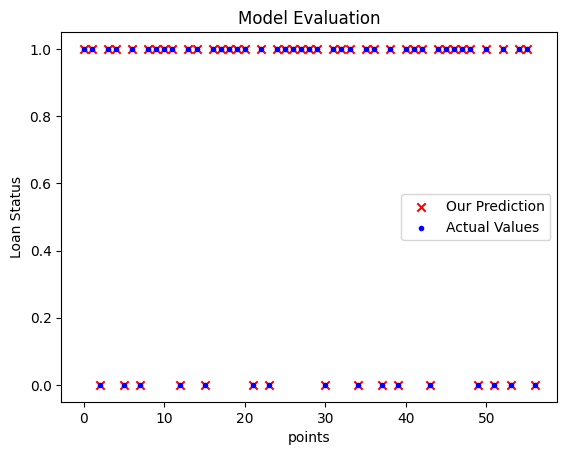

In [29]:
pts = np.arange(len(y_train))
# Plot our model prediction
plt.scatter(pts, y_pred, marker='x', c='r',label='Our Prediction')
# Plot the data points
plt.scatter(pts, y_train, marker='.', c='b',label='Actual Values')
# Set the title
plt.title("Model Evaluation")
# Set the y-axis label
plt.ylabel('Loan Status')
# Set the x-axis label
plt.xlabel('points')
plt.legend()
plt.show()

With Scikit_Learn, we get a better result comparing to our initial model

In [30]:
print("Accuracy on training set:", lr_model.score(X_train, y_train))

Accuracy on training set: 1.0
